In [4]:
import CONFIG as C
from utils_Sep import *
import os
import numpy as np
import pandas as pd
import time
# test02061823pm


# 把服务器上复制过来的转化为list
target_str = '0G,1INCH,2Z,A,AAVE,ACE,ACH,ACT,ADA,AERO,AEVO,AGLD,AIXBT,ALGO,ALLO,ANIME,APE,API3,APR,APT,AR,ARB,ARKM,ASTER,AT,ATH,ATOM,AUCTION,AVAX,AVNT,AXS,BABY,BAND,BARD,BAT,BCH,BEAT,BERA,BICO,BIGTIME,BIO,BLUAI,BLUR,BNB,BOME,BRETT,BTC,CATI,CC,CELO,CETUS,CFX,CHZ,COAI,COMP,COOKIE,CRV,CVX,DASH,DEGEN,DOGE,DOOD,DOT,DYDX,EDEN,EGLD,EIGEN,ENA,ENJ,ENS,ENSO,ETC,ETH,ETHFI,ETHW,F,FARTCOIN,FIL,FLOW,FXS,GALA,GAS,GIGGLE,GLM,GMT,GMX,GPS,GRASS,GRT,H,HBAR,HMSTR,HOME,HUMA,HYPE,ICP,ICX,IMX,INIT,INJ,IOST,IOTA,IP,JCT,JELLYJELLY,JTO,JUP,KAITO,KGEN,KMNO,KSM,LA,LAB,LAYER,LDO,LIGHT,LINEA,LINK,LPT,LQTY,LRC,LTC,MAGIC,MANA,MASK,ME,MEME,MERL,MET,METIS,MEW,MINA,MMT,MON,MOODENG,MORPHO,MOVE,MUBARAK,NEAR,NEIRO,NEO,NIGHT,NMR,NOT,OL,OM,ONDO,ONE,ONT,OP,ORDER,ORDI,PARTI,PENDLE,PENGU,PEOPLE,PIEVERSE,PIPPIN,PLUME,PNUT,POL,POPCAT,PROMPT,PROVE,PUMP,PYTH,QTUM,RAVE,RECALL,RENDER,RESOLV,RLS,RSR,RVN,S,SAHARA,SAND,SAPIEN,SEI,SENT,SHELL,SIGN,SKY,SNX,SOL,SOLV,SOON,SOPH,SPK,SPX,SSV,STABLE,STRK,STX,SUI,SUSHI,SYRUP,TAO,THETA,TIA,TON,TRB,TREE,TRUMP,TRUST,TRUTH,TRX,TURBO,TURTLE,UMA,UNI,USELESS,VANA,VIRTUAL,W,WAL,WCT,WET,WIF,WLD,WLFI,WOO,XAN,XLM,XPL,XRP,XTZ,YB,YFI,YGG,ZBT,ZEC,ZEN,ZETA,ZIL,ZK,ZORA,ZRO,ZRX'
target_list = target_str.split(',')
print(str(target_list))

['0G', '1INCH', '2Z', 'A', 'AAVE', 'ACE', 'ACH', 'ACT', 'ADA', 'AERO', 'AEVO', 'AGLD', 'AIXBT', 'ALGO', 'ALLO', 'ANIME', 'APE', 'API3', 'APR', 'APT', 'AR', 'ARB', 'ARKM', 'ASTER', 'AT', 'ATH', 'ATOM', 'AUCTION', 'AVAX', 'AVNT', 'AXS', 'BABY', 'BAND', 'BARD', 'BAT', 'BCH', 'BEAT', 'BERA', 'BICO', 'BIGTIME', 'BIO', 'BLUAI', 'BLUR', 'BNB', 'BOME', 'BRETT', 'BTC', 'CATI', 'CC', 'CELO', 'CETUS', 'CFX', 'CHZ', 'COAI', 'COMP', 'COOKIE', 'CRV', 'CVX', 'DASH', 'DEGEN', 'DOGE', 'DOOD', 'DOT', 'DYDX', 'EDEN', 'EGLD', 'EIGEN', 'ENA', 'ENJ', 'ENS', 'ENSO', 'ETC', 'ETH', 'ETHFI', 'ETHW', 'F', 'FARTCOIN', 'FIL', 'FLOW', 'FXS', 'GALA', 'GAS', 'GIGGLE', 'GLM', 'GMT', 'GMX', 'GPS', 'GRASS', 'GRT', 'H', 'HBAR', 'HMSTR', 'HOME', 'HUMA', 'HYPE', 'ICP', 'ICX', 'IMX', 'INIT', 'INJ', 'IOST', 'IOTA', 'IP', 'JCT', 'JELLYJELLY', 'JTO', 'JUP', 'KAITO', 'KGEN', 'KMNO', 'KSM', 'LA', 'LAB', 'LAYER', 'LDO', 'LIGHT', 'LINEA', 'LINK', 'LPT', 'LQTY', 'LRC', 'LTC', 'MAGIC', 'MANA', 'MASK', 'ME', 'MEME', 'MERL', 'MET', 'M

In [5]:
import ccxt

def list_perp_bases(exchange_name: str) -> list[str]:
    """
    Input: exchange_name (ccxt exchange id), e.g. "binance", "okx", "bybit"
    Output: list of contract bases like ['ETH','SOL','BTC'] from USDT perpetual swaps.
    
    Notes:
    - 默认抓 USDT 永续 (swap) 合约
    - 返回的是 base（ETH、BTC），去重 + 排序
    """
    if not hasattr(ccxt, exchange_name):
        raise ValueError(f"Unknown exchange '{exchange_name}'. Example ids: binance, okx, bybit ...")

    ex = getattr(ccxt, exchange_name)({
        "enableRateLimit": True,
        # 有些所需要显式指定 defaultType，尽量通用
        "options": {
            "defaultType": "swap",
        },
    })

    markets = ex.load_markets()

    bases = set()
    for m in markets.values():
        # ccxt 统一字段：swap / future / option / spot；contract 表示衍生品
        if not m.get("active", True):
            continue
        if not m.get("contract", False):
            continue
        if not m.get("swap", False):          # 只要永续
            continue
        if m.get("settle") != "USDT":         # 只要 USDT 结算（你也可以改成 m['quote']=='USDT'）
            continue

        base = m.get("base")
        if base:
            bases.add(base)

    return sorted(bases)



# for name in ["binance", "okx", "bybit"]:
#     lst = list_perp_bases(name)
#     print(name, len(lst), lst[:20])


In [5]:
lst = list_perp_bases("gate")

In [6]:
lst

['0G',
 '1',
 '1INCH',
 '2Z',
 '4',
 '42',
 'A',
 'A2Z',
 'AAPLX',
 'AAVE',
 'ACE',
 'ACH',
 'ACT',
 'ACU',
 'ACX',
 'ADA',
 'AERGO',
 'AERO',
 'AEVO',
 'AGI',
 'AGLD',
 'AGT',
 'AI',
 'AIA',
 'AIN',
 'AIO',
 'AIOT',
 'AIOZ',
 'AIXBT',
 'AKE',
 'AKT',
 'ALCH',
 'ALEO',
 'ALGO',
 'ALICE',
 'ALL',
 'ALLO',
 'ALMANAK',
 'ALPINE',
 'ALT',
 'AMZNX',
 'ANIME',
 'ANKR',
 'APE',
 'API3',
 'APR',
 'APT',
 'AR',
 'ARB',
 'ARC',
 'ARIA',
 'ARK',
 'ARKM',
 'ARPA',
 'ASP',
 'ASR',
 'ASTER',
 'ASTR',
 'AT',
 'ATH',
 'ATOM',
 'AUCTION',
 'AVA',
 'AVAAI',
 'AVAX',
 'AVL',
 'AVNT',
 'AWE',
 'AXS',
 'B',
 'B2',
 'B3',
 'BABY',
 'BAN',
 'BANANA',
 'BANANAS31',
 'BAND',
 'BANK',
 'BARD',
 'BAS',
 'BAT',
 'BB',
 'BCH',
 'BDXN',
 'BEAMX',
 'BEAT',
 'BEL',
 'BERA',
 'BGSC',
 'BICO',
 'BID',
 'BIGTIME',
 'BIO',
 'BLAST',
 'BLESS',
 'BLUAI',
 'BLUR',
 'BMT',
 'BNB',
 'BNT',
 'BOB',
 'BOBA',
 'BOME',
 'BONK',
 'BR',
 'BRETT',
 'BREV',
 'BROCCOLI',
 'BROCCOLIF3B',
 'BSV',
 'BTC',
 'BTR',
 'C',
 'C98',
 'CAKE',
 

In [ ]:
for name in ["binance", "okx", "bybit"]:
    lst = list_perp_bases(name)
    print(name, len(lst), lst[:20])

In [ ]:
/Users/rayxu/Downloads/RATS_USDT.csv

In [2]:

def analyze_funding_rate_single_v1(
    symbol,
    last_time,
    lookback_window=14,
    isPlotMatplotlib=False,
    isPlotPlotly=False,
    mode='BN',  # 'BN'/'OKX'/'BYBIT'/'GATE'
    features_csv_path=None,

    # 触发阈值（你可以按自己口味调）
    min_mode_prop=0.75,     # funding 为正(含0)的占比门槛
    min_earn_mean=0.0002,   # 日均 funding(小数)门槛，0.0002=2bps/day
    min_earn_1day=0.0002,   # 最近1天累计 funding 门槛
    ):
    """
    单交易所资金费率分析：用于筛 long spot & short perp（要求 funding > 0 且稳定）

    Returns dict:
    {
        'symbol': symbol,
        'exchange': mode,
        'latest_cumulative': latest_cumulative,
        'earn': earn,                 # 近N天累计 funding
        'earn_1day': earn_1day,       # 近1天累计 funding
        'earn_mean': earn_mean,       # 日均 funding
        'mode_binary_prop': mode_binary_prop,  # 众数符号(+1或-1)占比(含0)
        'mode_sign_binary': mode_sign_binary,  # +1 或 -1
        'do_indicator': do_indicator,
        'funding_df': funding_df,     # index=FundingTime, col=FundingRate
        'funding_interval': funding_interval, # 小时
        'fig_matplotlib': fig_matplotlib,
        'fig_plotly': fig_plotly,
    }
    """

    start_time = last_time - pd.Timedelta(days=lookback_window)

    # --- 1) 路径与交易所映射（沿用你原来的 C 常量目录）---
    mode_up = mode.upper()
    if mode_up == 'BN':
        csv_path = f'{C.FUNDING_RATE_BINANCE_DIR}/{symbol}USDT.csv'
        exch = 'binance'
        title_exch = 'Binance'
    elif mode_up == 'OKX':
        csv_path = f'{C.FUNDING_RATE_OKX_DIR}/{symbol}-USDT-SWAP.csv'
        exch = 'okx'
        title_exch = 'OKX'
    elif mode_up == 'BYBIT':
        csv_path = f'{C.FUNDING_RATE_BYBIT_DIR}/{symbol}USDT.csv'
        exch = 'bybit'
        title_exch = 'Bybit'
    elif mode_up == 'GATE':
        csv_path = f'{C.FUNDING_RATE_GATE_DIR}/{symbol}_USDT.csv'
        exch = 'gate'
        title_exch = 'Gate'
    else:
        csv_path = f'{C.FUNDING_RATE_BINANCE_DIR}/{symbol}USDT.csv'
        exch = 'binance'
        title_exch = 'Binance'

    # print(csv_path)
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"[{symbol}] funding csv not found: {csv_path}")

    # --- 2) 读 & 统一时间（复用你的函数）---
    df = process_funding_time_v3(csv_path, exch)

    # --- 3) 时间窗过滤 ---
    d = df[(df['Time'] >= start_time) & (df['Time'] < last_time)].copy()

    # --- 4) 去重 + 丢最后一条（与你 diff 版本一致）---
    d = d.drop_duplicates(subset='FundingTime', keep='last')
    if len(d) >= 1:
        d = d[:-1]  # drop last incomplete funding bucket

    fig_matplotlib = None
    fig_plotly = None

    if len(d) < 2:
        return {
            'symbol': symbol,
            'exchange': mode_up,
            'latest_cumulative': 0.0,
            'earn': 0.0,
            'earn_1day': 0.0,
            'earn_mean': np.nan,
            'mode_binary_prop': 0.0,
            'mode_sign_binary': 0,
            'do_indicator': False,
            'funding_df': pd.DataFrame(),
            'funding_interval': np.nan,
            'fig_matplotlib': fig_matplotlib,
            'fig_plotly': fig_plotly,
            'error': 'insufficient_data'
        }

    # --- 5) 计算 funding 指标 ---
    earn = float(d['FundingRate'].sum())

    day_start = last_time - pd.Timedelta(days=1)
    earn_1day = float(d[d['Time'] >= day_start]['FundingRate'].sum())

    funding_interval = int((d.iloc[-1]['FundingTime'] - d.iloc[-2]['FundingTime']).total_seconds() / 3600)

    times = d['FundingTime'].sort_values()
    total_days = (times.iloc[-1] - times.iloc[0]).total_seconds() / (3600 * 24)
    earn_mean = (earn / total_days) if total_days > 0 else np.nan

    # --- 6) 符号众数及占比（复刻你原逻辑：0 也计入）---
    sgn = np.sign(d['FundingRate'].to_numpy())
    prop = pd.Series(sgn).value_counts(normalize=True)
    prop_full = {k: prop.get(k, 0.0) for k in [-1, 0, 1]}

    if prop_full[1] >= prop_full[-1]:
        mode_sign_binary = 1
        mode_binary_prop = prop_full[1] + prop_full[0]
    else:
        mode_sign_binary = -1
        mode_binary_prop = prop_full[-1] + prop_full[0]

    # --- 7) 触发条件：吃正 funding（long spot & short perp）---
    do_indicator = (
        (mode_binary_prop > min_mode_prop) and
        (mode_sign_binary == 1) and
        (earn_mean > min_earn_mean) and
        (earn_1day > min_earn_1day)
    )

    funding_df = d[['FundingTime', 'FundingRate']].set_index('FundingTime').sort_index()
    cumsum_values = funding_df['FundingRate'].cumsum()
    latest_cumulative = float(cumsum_values.iloc[-1]) if len(cumsum_values) > 0 else 0.0

    # =========================
    # Plotting (Matplotlib)
    # =========================
    if isPlotMatplotlib:
        import matplotlib.pyplot as plt
        from matplotlib.gridspec import GridSpec

        # 读取特征信息（如果提供了路径）
        feature_text = None
        if features_csv_path and os.path.exists(features_csv_path):
            try:
                features_df = pd.read_csv(features_csv_path)
                symbol_with_usdt = f'{symbol}-USDT'
                symbol_row = features_df[features_df['Symbol'] == symbol_with_usdt]

                if symbol_row.empty:
                    print(f"[Matplotlib] ⚠️  特征文件中未找到 {symbol_with_usdt}")
                else:
                    print(f"[Matplotlib] ✅ 成功读取 {symbol} 的流动性特征信息")
                    feature_cols = [
                        'tick_size_factor', 'q_range', 'do_indicator', 'do_indicator_low',
                        'do_indicator_MMR', 'ex0_24h_usdt', 'ex1_24h_usdt', 'rank_by_amount',
                        'market_cap', 'open_interest0', 'open_interest1', 'InsuranceFund0',
                        'InsuranceFund1', 'IsExtremeSpread', 'IsExtremeFr', 'IsExtremeFrSpread'
                    ]

                    feature_lines = [f'Liquidity Info ({symbol_with_usdt})', '-' * 35]
                    wan_unit_cols = [
                        'ex0_24h_usdt', 'ex1_24h_usdt', 'open_interest0', 'open_interest1',
                        'InsuranceFund0', 'InsuranceFund1', 'market_cap'
                    ]

                    for col in feature_cols:
                        if col in symbol_row.columns:
                            value = symbol_row[col].iloc[0]
                            if pd.notna(value):
                                if col in wan_unit_cols:
                                    try:
                                        wan_value = int(float(value) / 10000)
                                        formatted_value = f"{wan_value}(WU)"
                                    except (ValueError, TypeError):
                                        formatted_value = "N/A"
                                elif isinstance(value, (int, np.integer)):
                                    formatted_value = f"{value:,}"
                                elif isinstance(value, (float, np.floating)):
                                    formatted_value = f"{value:,.4g}"
                                else:
                                    formatted_value = str(value)
                            else:
                                formatted_value = "N/A"
                            feature_lines.append(f"{col}: {formatted_value}")

                    feature_text = '\n'.join(feature_lines)
            except Exception as e:
                print(f"[Matplotlib] ❌ 读取特征文件时出错: {e}")
        elif features_csv_path and not os.path.exists(features_csv_path):
            print(f"[Matplotlib] ⚠️  特征文件不存在: {features_csv_path}")

        # 画布布局
        if feature_text:
            fig = plt.figure(figsize=(16, 8))
            gs = GridSpec(
                2, 2, figure=fig,
                width_ratios=[3, 1],
                hspace=0.15, wspace=0.08,
                left=0.08, right=0.98, top=0.95, bottom=0.08
            )
            ax1 = fig.add_subplot(gs[0, 0])
            ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
            ax_text = fig.add_subplot(gs[:, 1])
        else:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

        # 上图：单期 funding bps
        (funding_df['FundingRate'] * 10000).plot(ax=ax1, color='blue', linewidth=1.5)
        ax1.set_title(f'{title_exch} Funding Rate for {symbol} (bps)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Funding (bps)', fontsize=12)
        ax1.grid(True, linestyle='--', alpha=0.7)

        # 下图：累计 funding bps（如果最后为负，翻正展示“吃费强度”的幅度，保持你原风格）
        cumsum_plot = cumsum_values.copy()
        if len(cumsum_plot) > 0 and cumsum_plot.iloc[-1] < 0:
            cumsum_plot = -cumsum_plot
        (cumsum_plot * 10000).plot(ax=ax2, color='green', linewidth=1.5)
        ax2.set_title(f'Cumulative Funding for {symbol} (bps)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('FundingTime', fontsize=12)
        ax2.set_ylabel('Cumulative (bps)', fontsize=12)
        ax2.grid(True, linestyle='--', alpha=0.7)

        # 右侧特征框
        if feature_text:
            ax_text.axis('off')
            ax_text.text(
                0.02, 0.99, feature_text,
                transform=ax_text.transAxes,
                fontsize=8,
                verticalalignment='top',
                horizontalalignment='left',
                fontfamily='monospace',
                bbox=dict(
                    boxstyle='round,pad=0.5',
                    facecolor='wheat', alpha=0.5,
                    edgecolor='gray', linewidth=0.5
                )
            )

        fig_matplotlib = fig
        plt.show()

    # =========================
    # Plotting (Plotly)
    # =========================
    if isPlotPlotly:
        import plotly.graph_objects as go
        from plotly.subplots import make_subplots

        # 单期 bps
        fr_bps = funding_df['FundingRate'] * 10000

        # 累计 bps（保持你原风格：最后为负则翻正）
        cumsum_plot = cumsum_values.copy()
        if len(cumsum_plot) > 0 and cumsum_plot.iloc[-1] < 0:
            cumsum_plot = -cumsum_plot
        cumsum_bps = cumsum_plot * 10000

        fig = make_subplots(
            rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.08,
            subplot_titles=(
                f"{title_exch} Funding Rate for {symbol} (bps)",
                f"Cumulative Funding for {symbol} (bps)"
            )
        )

        fig.add_trace(
            go.Scatter(
                x=fr_bps.index,
                y=fr_bps.values,
                mode="lines",
                name="funding (bps)",
            ),
            row=1, col=1
        )

        fig.add_trace(
            go.Scatter(
                x=cumsum_bps.index,
                y=cumsum_bps.values,
                mode="lines",
                name="cumulative (bps)",
            ),
            row=2, col=1
        )

        fig.update_yaxes(title_text="Funding (bps)", row=1, col=1, zeroline=True)
        fig.update_yaxes(title_text="Cumulative (bps)", row=2, col=1, zeroline=True)

        fig.update_layout(
            title=f"{title_exch} Funding — {symbol}",
            height=600,
            width=800,
            hovermode="x unified",
            showlegend=True,
            margin=dict(l=40, r=20, t=80, b=40),
        )

        # 读取并显示特征信息（右侧注释）
        if features_csv_path and os.path.exists(features_csv_path):
            try:
                features_df = pd.read_csv(features_csv_path)
                symbol_with_usdt = f'{symbol}-USDT'
                symbol_row = features_df[features_df['Symbol'] == symbol_with_usdt]

                if symbol_row.empty:
                    print(f"[Plotly] ⚠️  特征文件中未找到 {symbol_with_usdt}")
                else:
                    print(f"[Plotly] ✅ 成功读取 {symbol} 的流动性特征信息")

                    feature_cols = [
                        'tick_size_factor', 'q_range', 'do_indicator', 'do_indicator_low',
                        'do_indicator_MMR', 'ex0_24h_usdt', 'ex1_24h_usdt', 'rank_by_amount',
                        'market_cap', 'open_interest0', 'open_interest1', 'InsuranceFund0',
                        'InsuranceFund1', 'IsExtremeSpread', 'IsExtremeFr', 'IsExtremeFrSpread'
                    ]
                    wan_unit_cols = [
                        'ex0_24h_usdt', 'ex1_24h_usdt', 'open_interest0', 'open_interest1',
                        'InsuranceFund0', 'InsuranceFund1', 'market_cap'
                    ]

                    feature_text = f"<b>Liquidity Info ({symbol_with_usdt})</b><br>"
                    feature_text += "<br>" + "-" * 35 + "<br>"

                    for col in feature_cols:
                        if col in symbol_row.columns:
                            value = symbol_row[col].iloc[0]
                            if pd.notna(value):
                                if col in wan_unit_cols:
                                    try:
                                        wan_value = int(float(value) / 10000)
                                        formatted_value = f"{wan_value}(WU)"
                                    except (ValueError, TypeError):
                                        formatted_value = "N/A"
                                elif isinstance(value, (int, np.integer)):
                                    formatted_value = f"{value:,}"
                                elif isinstance(value, (float, np.floating)):
                                    formatted_value = f"{value:,.4g}"
                                else:
                                    formatted_value = str(value)
                            else:
                                formatted_value = "N/A"
                            feature_text += f"<br>{col}: {formatted_value}"

                    fig.add_annotation(
                        text=feature_text,
                        xref="paper", yref="paper",
                        x=1.02, y=0.98,
                        xanchor="left", yanchor="top",
                        align="left",
                        showarrow=False,
                        bgcolor="rgba(255, 255, 255, 0.9)",
                        bordercolor="gray",
                        borderwidth=1,
                        font=dict(size=9, family="monospace"),
                    )

                    fig.update_layout(
                        width=1200,
                        margin=dict(l=40, r=350, t=80, b=40),
                    )
            except Exception as e:
                print(f"[Plotly] ❌ 读取特征文件时出错: {e}")
        elif features_csv_path and not os.path.exists(features_csv_path):
            print(f"[Plotly] ⚠️  特征文件不存在: {features_csv_path}")

        fig_plotly = fig
        fig.show()

    return {
        'symbol': symbol,
        'exchange': mode_up,
        'latest_cumulative': latest_cumulative,
        'earn': earn,
        'earn_1day': earn_1day,
        'earn_mean': earn_mean,
        'mode_binary_prop': mode_binary_prop,
        'mode_sign_binary': mode_sign_binary,
        'do_indicator': do_indicator,
        'funding_df': funding_df,
        'funding_interval': funding_interval,
        'fig_matplotlib': fig_matplotlib,
        'fig_plotly': fig_plotly
    }


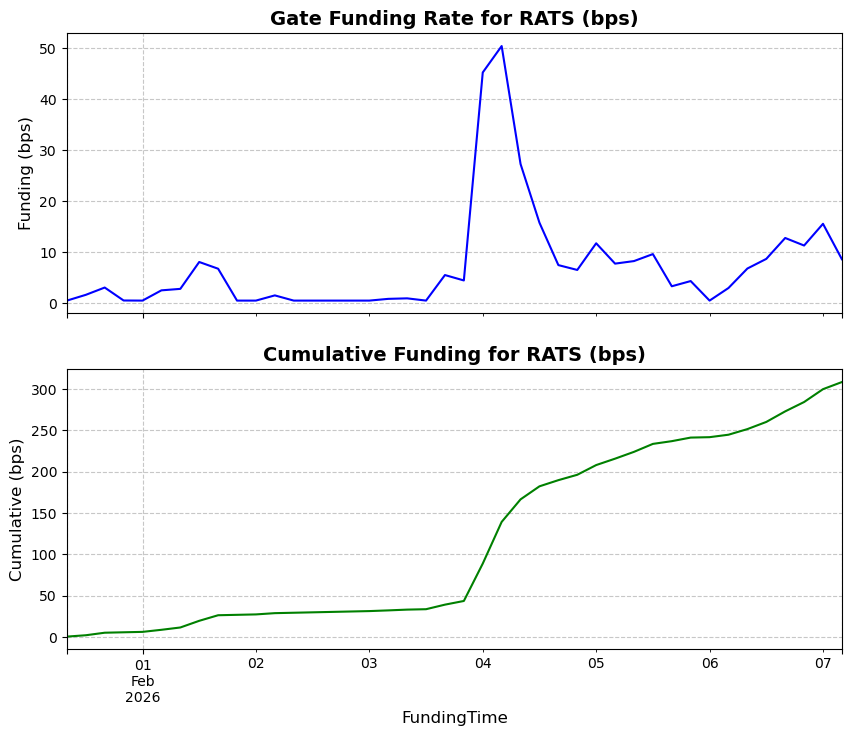

In [7]:
# ===== 参数区：你只要改这里 =====
mode = 'GATE'                 # 'BN'/'OKX'/'BYBIT'/'GATE'
last_time = C.last_time_cf
lookback_window = 7

# 筛选阈值（沿用 analyze_funding_rate_single_v1 的默认口味，你也可以在这里传进去覆盖）
min_mode_prop = 0.75
min_earn_mean = 0.0002
min_earn_1day = 0.0002

symbol = 'RATS'

r = analyze_funding_rate_single_v1(
    symbol=symbol,
    last_time=last_time,
    lookback_window=lookback_window,
    mode=mode,
    isPlotMatplotlib=True,
    isPlotPlotly=False,
    features_csv_path=None,   # 如果你要展示特征信息就填路径
    min_mode_prop=min_mode_prop,
    min_earn_mean=min_earn_mean,
    min_earn_1day=min_earn_1day,
)

In [3]:
# ===== 参数区：你只要改这里 =====
mode = 'BN'                 # 'BN'/'OKX'/'BYBIT'/'GATE'
last_time = C.last_time_cf
last_time = pd.to_datetime('2026-01-21 08:05:00')  # 测试用固定时间点
lookback_window = 7

# 筛选阈值（沿用 analyze_funding_rate_single_v1 的默认口味，你也可以在这里传进去覆盖）
min_mode_prop = 0.75
min_earn_mean = 0.0002
min_earn_1day = 0.0002

results = []
symbol_list = target_list
symbol_list = ['WLD','VIRTUAL','TRUMP']
# symbol_list = ['BTC','ETH','SOL','ADA']

for symbol in symbol_list:
    t0 = time.time()
    try:
        r = analyze_funding_rate_single_v1(
            symbol=symbol,
            last_time=last_time,
            lookback_window=lookback_window,
            mode=mode,
            isPlotMatplotlib=False,
            isPlotPlotly=False,
            features_csv_path=None,   # 如果你要展示特征信息就填路径
            min_mode_prop=min_mode_prop,
            min_earn_mean=min_earn_mean,
            min_earn_1day=min_earn_1day,
        )

        results.append({
            'symbol': r.get('symbol'),
            'exchange': r.get('exchange'),
            'do_indicator': r.get('do_indicator', False),

            'earn': r.get('earn', np.nan),
            'earn_1day': r.get('earn_1day', np.nan),
            'earn_mean': r.get('earn_mean', np.nan),

            'mode_binary_prop': r.get('mode_binary_prop', np.nan),
            'mode_sign_binary': r.get('mode_sign_binary', np.nan),

            'funding_interval': r.get('funding_interval', np.nan),
            'latest_cumulative': r.get('latest_cumulative', np.nan),

            'error': r.get('error', None),
            'runtime_s': round(time.time() - t0, 3),
        })

    except Exception as e:
        results.append({
            'symbol': symbol,
            'exchange': mode,
            'do_indicator': False,
            'earn': np.nan,
            'earn_1day': np.nan,
            'earn_mean': np.nan,
            'mode_binary_prop': np.nan,
            'mode_sign_binary': np.nan,
            'funding_interval': np.nan,
            'latest_cumulative': np.nan,
            'error': str(e),
            'runtime_s': round(time.time() - t0, 3),
        })
        print(f"[WARN] {symbol} failed: {e}")

# 将结果转换为DataFrame
results_df = pd.DataFrame(results)

# 1) 只看“优先正的”：earn_mean > 0
results_pos = results_df[results_df['earn_mean'] > 0].copy()

# 2) 可选：只看 do_indicator==True 的更强信号（你想更保守就开）
# results_pos = results_pos[results_pos['do_indicator'] == True].copy()

# 3) 排序：earn_mean 降序（优先正的），其次 1day / 稳定性
results_pos = results_pos.sort_values(
    by=['earn_mean', 'earn_1day', 'mode_binary_prop'],
    ascending=[False, False, False]
).reset_index(drop=True)

# 4) 输出你要的最终结果（前 N 个）
topN = 50
print("\n==== TOP Candidates (positive earn_mean) ====")
print(results_pos.head(topN)[[
    'symbol','exchange','earn_mean','earn_1day','earn','mode_binary_prop','funding_interval','do_indicator','error'
]])

# 5) 如果你需要最终 symbol list：
final_symbol_list = results_pos.head(topN)['symbol'].tolist()
print("\nfinal_symbol_list =", final_symbol_list)





==== TOP Candidates (positive earn_mean) ====
  symbol exchange  earn_mean  earn_1day      earn  mode_binary_prop  \
0    WLD       BN   0.000092   0.000029  0.000613          0.714286   

   funding_interval  do_indicator error  
0                 8         False  None  

final_symbol_list = ['WLD']


In [10]:
results_pos.head(20)

,symbol,exchange,do_indicator,earn,earn_1day,earn_mean,mode_binary_prop,mode_sign_binary,funding_interval,latest_cumulative,error,runtime_s
0,RAVE,BN,True,0.007717,0.000250,0.001158,1.0,1,4.0,0.007717,None,0.075
1,LIGHT,BN,True,0.006452,0.000250,0.000968,1.0,1,4.0,0.006452,None,0.203
2,LAB,BN,True,0.006408,0.000250,0.000961,1.0,1,4.0,0.006408,None,0.432
3,H,BN,True,0.005337,0.000300,0.000781,1.0,1,4.0,0.005337,None,0.342
4,BEAT,BN,True,0.005233,0.000500,0.000766,1.0,1,4.0,0.005233,None,0.117
5,TRUTH,BN,True,0.005089,0.000250,0.000763,1.0,1,4.0,0.005089,None,0.179
6,KGEN,BN,True,0.004803,0.000541,0.000721,1.0,1,4.0,0.004803,None,0.173
7,USELESS,BN,True,0.004490,0.000970,0.000674,1.0,1,4.0,0.004490,None,0.249
8,APR,BN,True,0.003460,0.000250,0.000519,1.0,1,4.0,0.003460,None,0.150
9,JCT,BN,True,0.003053,0.000250,0.000458,1.0,1,4.0,0.003053,None,0.128


In [7]:
r

{'symbol': 'SUI',
 'exchange': 'BN',
 'latest_cumulative': 0.0,
 'earn': 0.0,
 'earn_1day': 0.0,
 'earn_mean': nan,
 'mode_binary_prop': 0.0,
 'mode_sign_binary': 0,
 'do_indicator': False,
 'funding_df': Empty DataFrame
 Columns: []
 Index: [],
 'funding_interval': nan,
 'fig_matplotlib': None,
 'fig_plotly': None,
 'error': 'insufficient_data'}

In [5]:
daily_list = ['FF','OP','CKB','SSV','ZEN','YB','DEXE','YFI','DASH','ZRO','CKB']

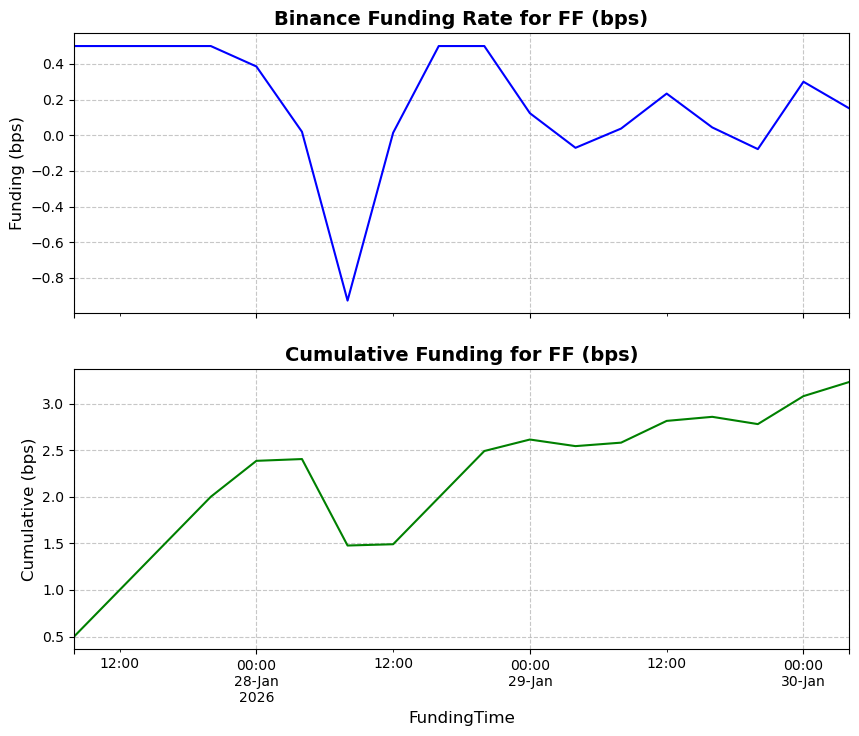

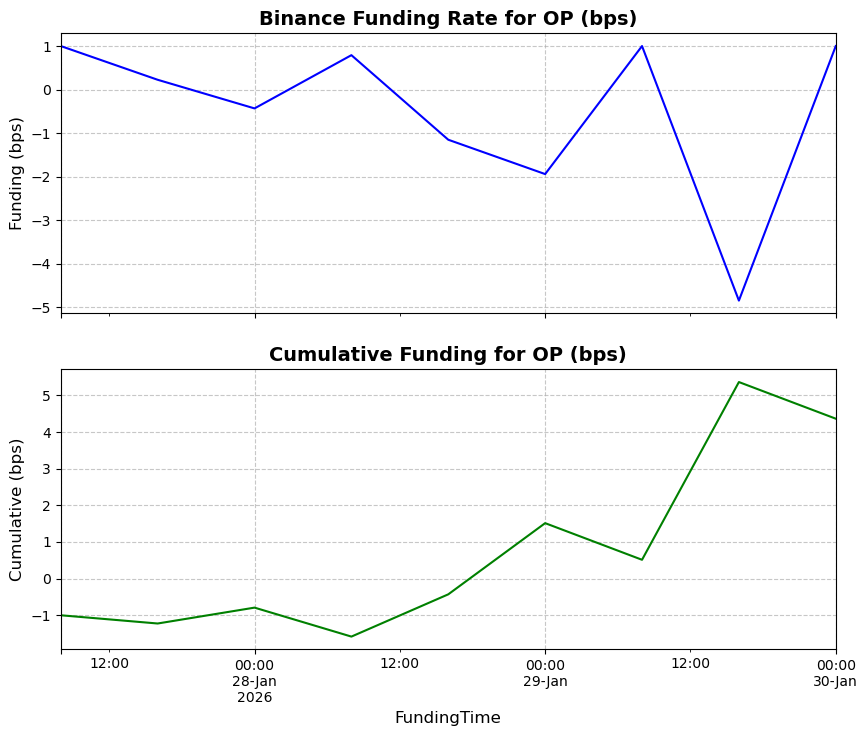

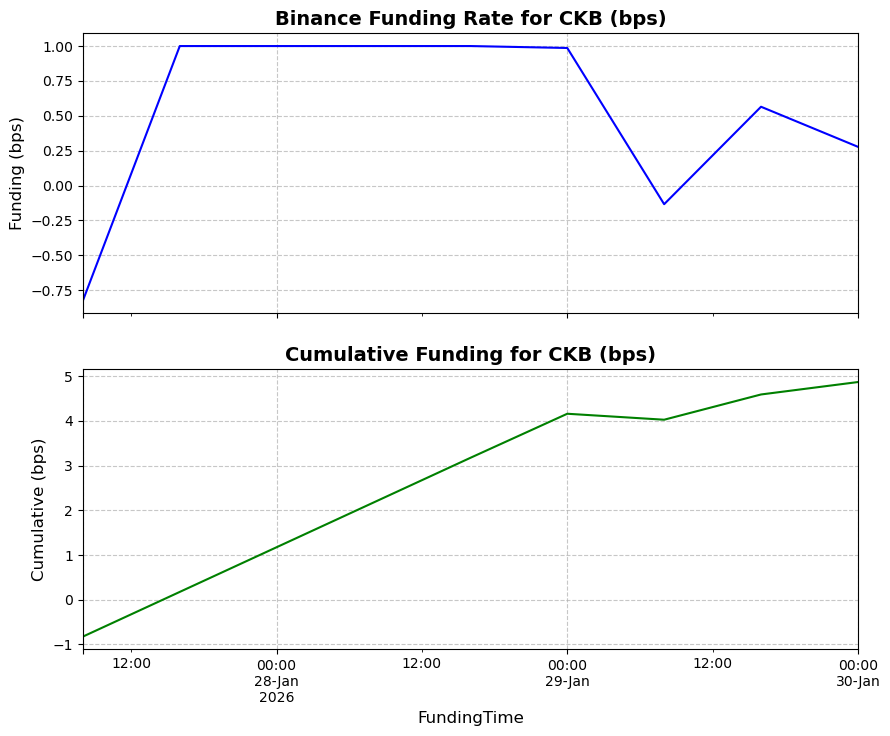

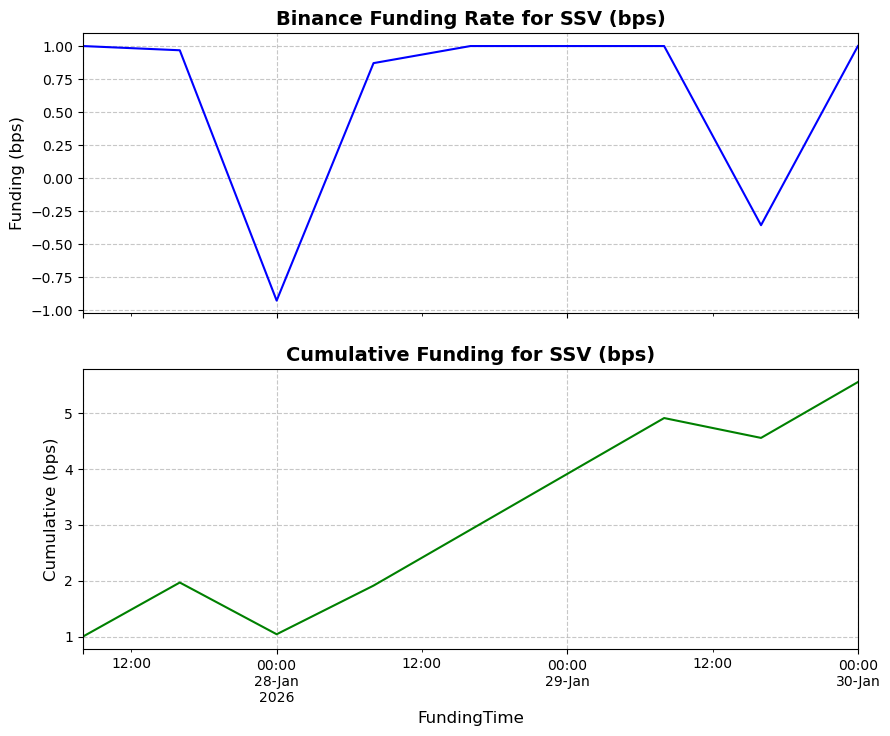

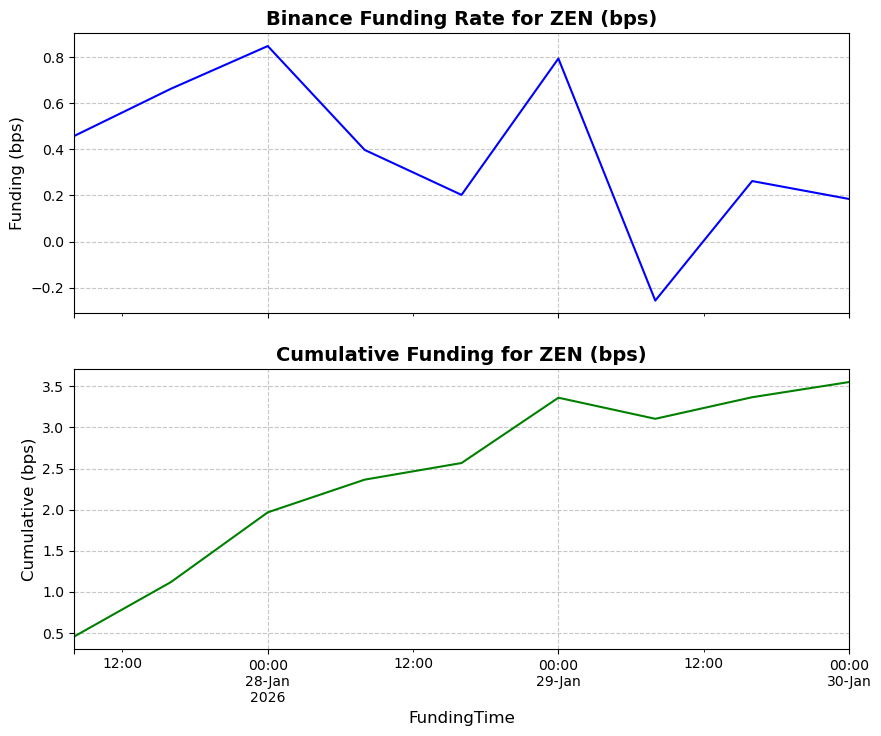

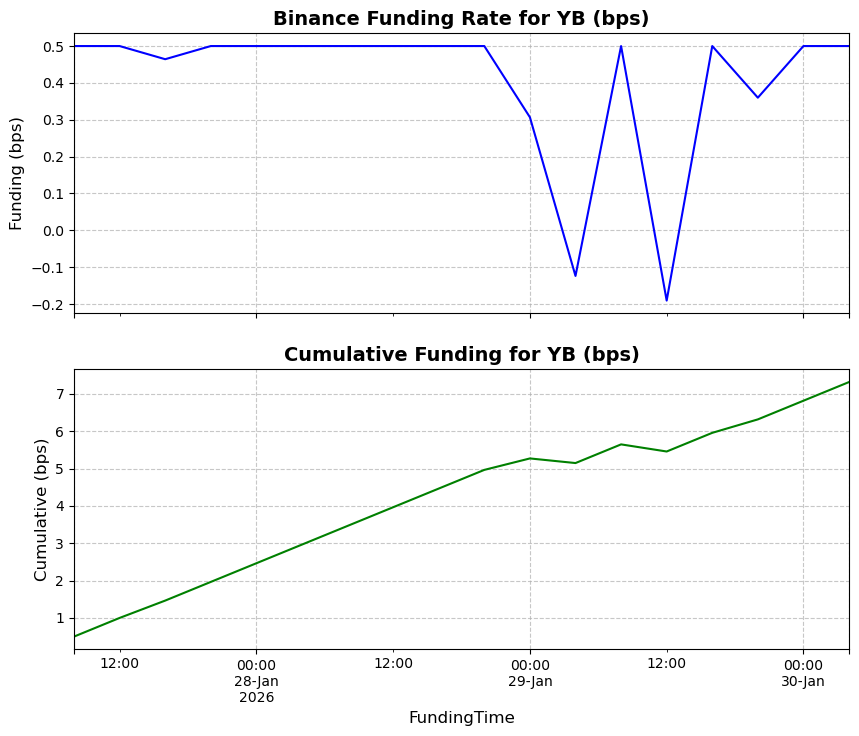

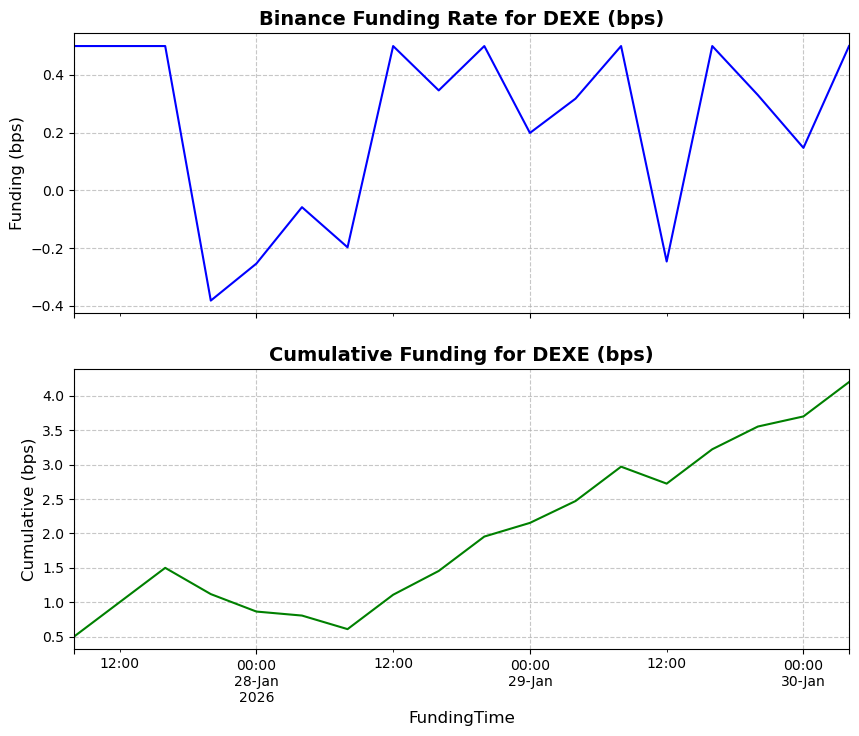

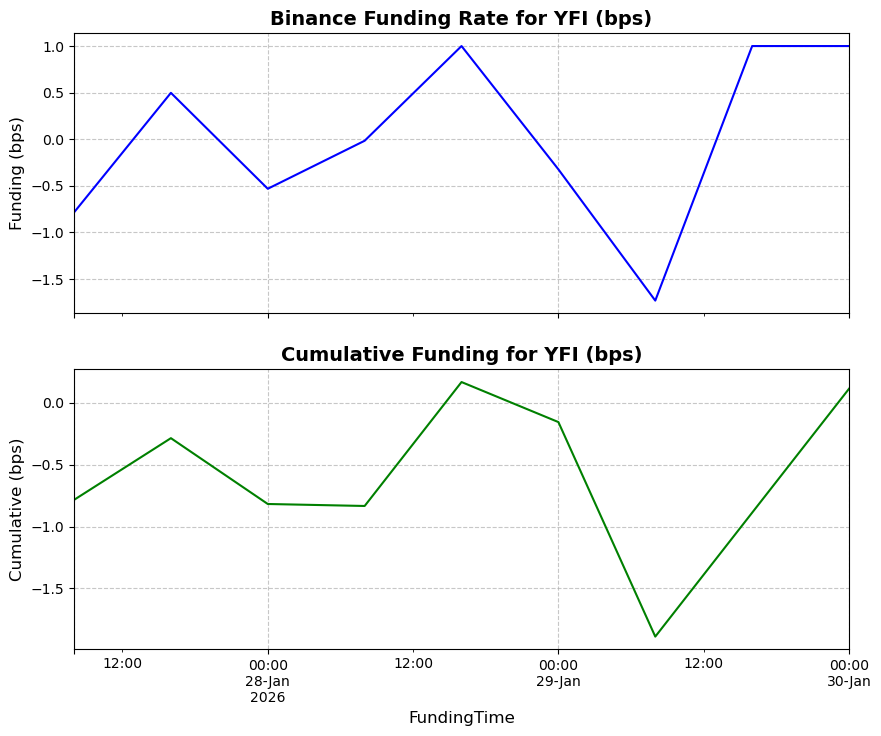

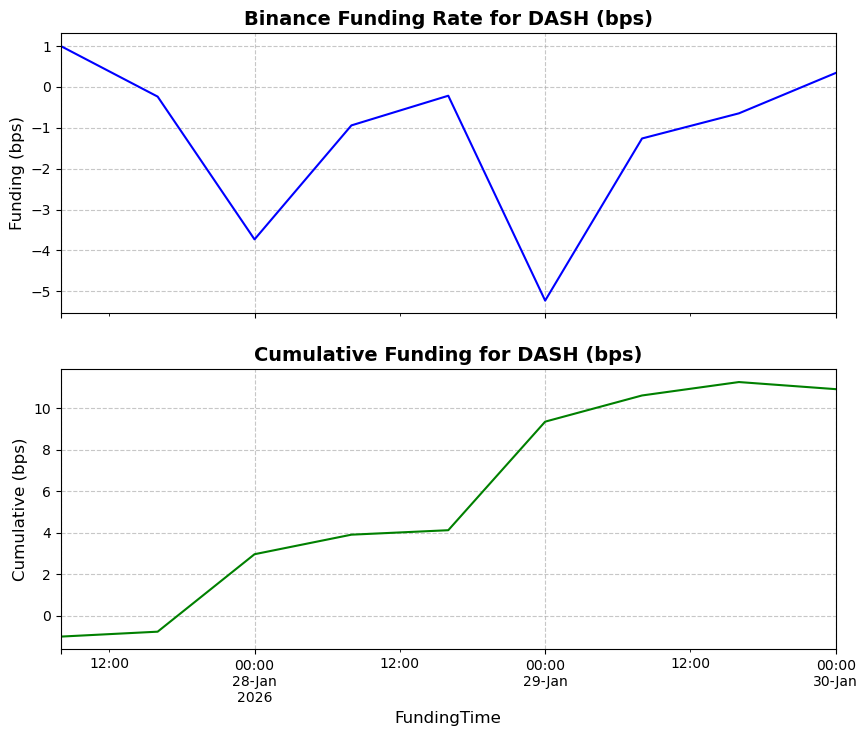

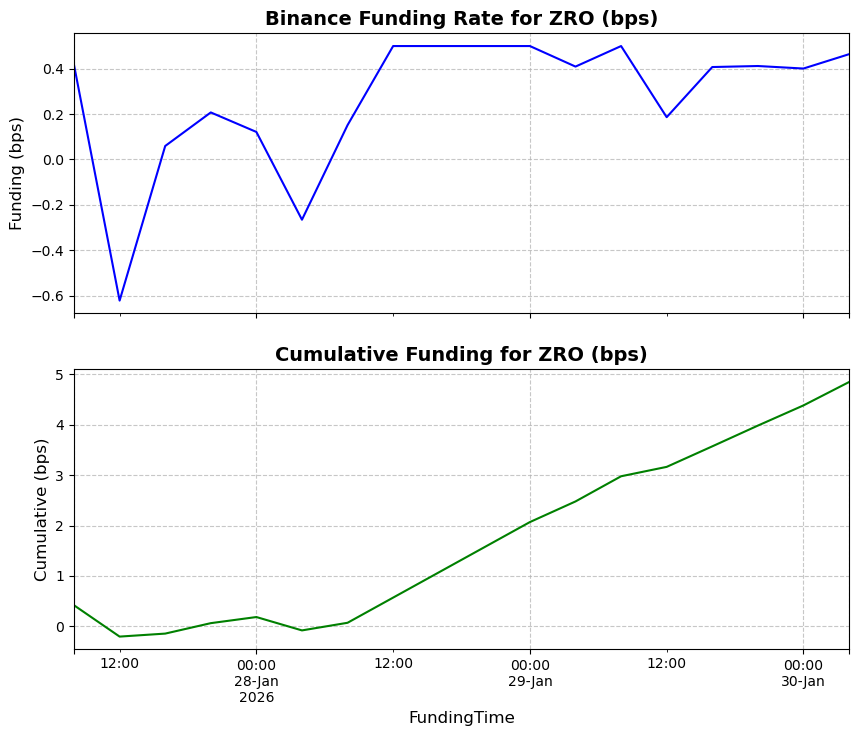

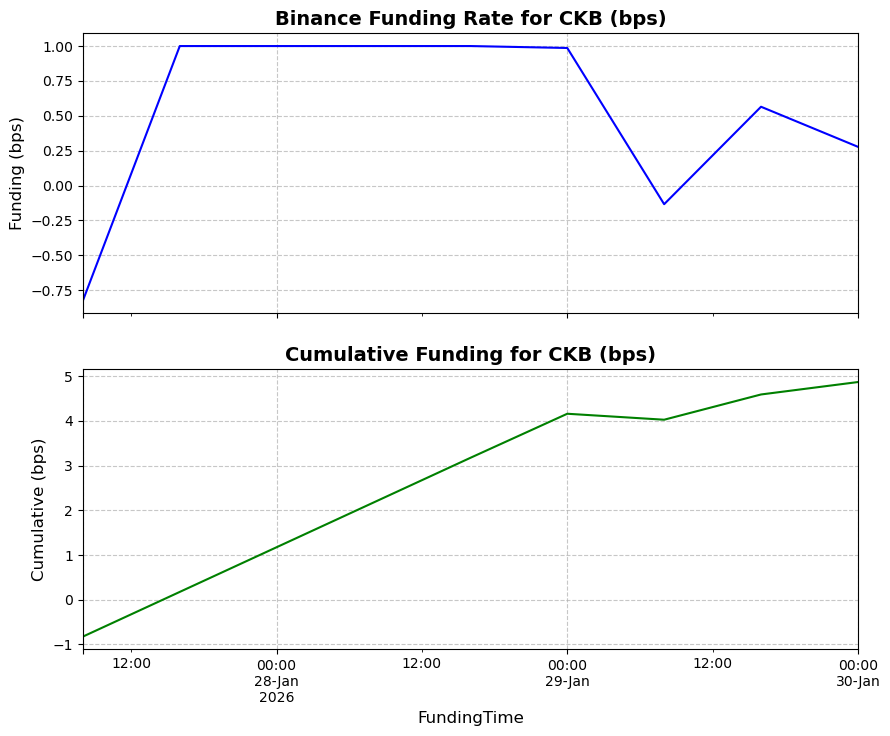

In [6]:
for symbol in daily_list:
    r = analyze_funding_rate_single_v1(
        symbol,
        last_time=pd.to_datetime('2026-01-30 04:05:00'),
        lookback_window=3,
        mode='BN',
        isPlotMatplotlib=True,
        isPlotPlotly=False
    )

